## 테이블의 내용은 아래의 내용을 담고 있습니다.
1. 고객이 각 귀속년도별
1. 근로 / 사업 / 기타 소득에 대한 예상환급액과 수수료를 조회한 뒤
1. 결제를 하거나 하지 않은 여부를 저장

## 컬럼 정보는 다음과 같습니다.
- age: 고객의 만 나이입니다. 
- gender: 고객의 성별입니다.
- year: 소득이 발생한 연도(귀속년도)입니다.
- refund: 예상환급액입니다.
- fee: 수수료입니다.
- has_paid: 수수료를 결제했는지의 여부
- income_근로: 고객의 근로소득(월급/일용직급여)
- income_사업: 고객의 사업소득(프리랜서 소득)
- income_기타: 고객의 기타소득(그외 기타 소득)

## 아래의 질문에 나름의 방식으로 답을 찾아주세요.
(정답은 없습니다. 문제를 정의하고, 해답에 이르게 된 과정과 그 해석을 잘 설득/설명해 주시는 것이 중요합니다.)

- 고객의 결제여부에 영향을 미치는 요인들은 무엇인가요? 
- 고객의 수수료 결제금액의 합을 높히기 위해서는 어떻게 해야 할까요?

삼쩜삼 수수료

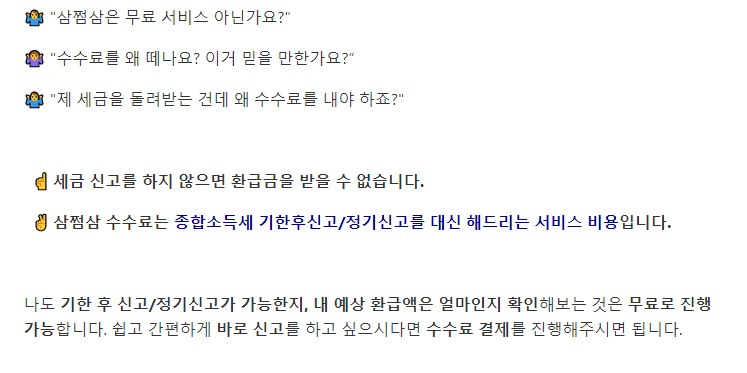
https://help.3o3.co.kr/hc/ko/articles/900004196546-Q-%EC%88%98%EC%88%98%EB%A3%8C%EB%8A%94-%EC%99%9C-%EB%82%B4%EC%95%BC-%ED%95%98%EB%82%98%EC%9A%94-

예상 환급액을 조회하는 것은 무료이고 종합소득세 신고를 대신 해주는 서비스이다. 대신 신고해줄 때 수수료가 발생한다.

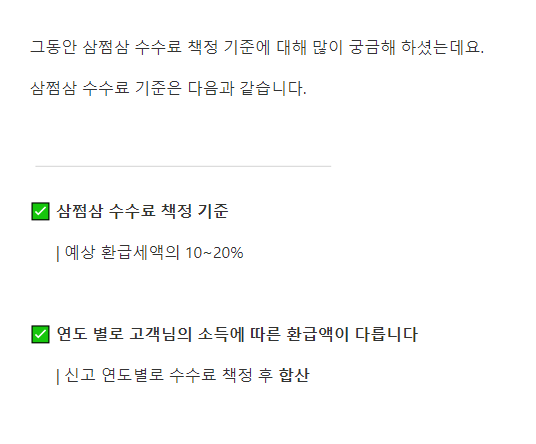
https://help.3o3.co.kr/hc/ko/articles/900004196526-Q-%EC%88%98%EC%88%98%EB%A3%8C-%EC%B1%85%EC%A0%95%EA%B8%B0%EC%A4%80%EC%9D%B4-%EC%96%B4%EB%96%BB%EA%B2%8C-%EB%90%98%EB%82%98%EC%9A%94-

수수료는 환급세액의 10~20%이다.

In [172]:
!pip install --upgrade category_encoders
!pip install eli5

Requirement already up-to-date: category_encoders in c:\users\jungjaehoon\anaconda3\lib\site-packages (2.2.2)


# import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'  # (Windows 용) 한글 출력을 위한 글꼴 설정
plt.rcParams['axes.unicode_minus'] = False   # 문자 - (마이너스) 정상 출력을 위한 코드

#  데이터 불러오기

In [2]:
df = pd.read_csv('Jobis_3o3.csv')
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN
...,...,...,...,...,...,...,...,...,...
99995,27.0,F,2019,301000.0,11900.0,True,NaN,NaN,680000.0
99996,62.0,F,2019,77000.0,1300.0,True,NaN,463000.0,NaN
99997,24.0,M,2020,9000.0,400.0,False,7923000.0,54000.0,NaN
99998,24.0,M,2019,34000.0,400.0,True,NaN,204000.0,NaN


#  데이터 살펴보기

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   age        100000 non-null  float64
 1   gender     100000 non-null  object 
 2   year       100000 non-null  int64  
 3   refund     100000 non-null  float64
 4   fee        100000 non-null  float64
 5   has_paid   100000 non-null  bool   
 6   income_근로  40791 non-null   float64
 7   income_사업  78227 non-null   float64
 8   income_기타  25260 non-null   float64
dtypes: bool(1), float64(6), int64(1), object(1)
memory usage: 6.2+ MB


## age

In [5]:
df['age'].describe()

count    100000.00000
mean         29.00096
std           7.76819
min          15.00000
25%          24.00000
50%          27.00000
75%          31.00000
max          81.00000
Name: age, dtype: float64

<AxesSubplot:title={'center':'연령별 데이터수'}, xlabel='age', ylabel='Count'>

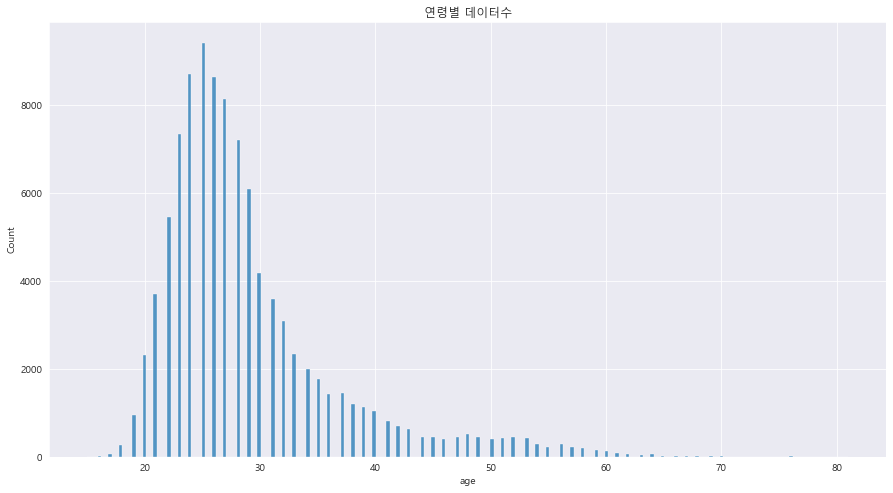

In [128]:
plt.figure(figsize = (15,8))
plt.title('연령별 데이터수')
sns.set_style("darkgrid")
sns.histplot(data=df, x="age")

20 ~ 30대가 대부분이다.<br>
20대초반 ~ 30대 초반까지가 많다.


## gender

In [9]:
df['gender'].value_counts()

M    50477
F    49501
-       22
Name: gender, dtype: int64

남녀 비율은 거의 반반이다. <br>성별이 없는 값이 조금 있다.

## year

In [10]:
df['year'].value_counts()

2020    23782
2019    20842
2018    19983
2017    17495
2016    13913
2015     3985
Name: year, dtype: int64

<AxesSubplot:title={'center':'연도별 데이터수'}, xlabel='year', ylabel='Count'>

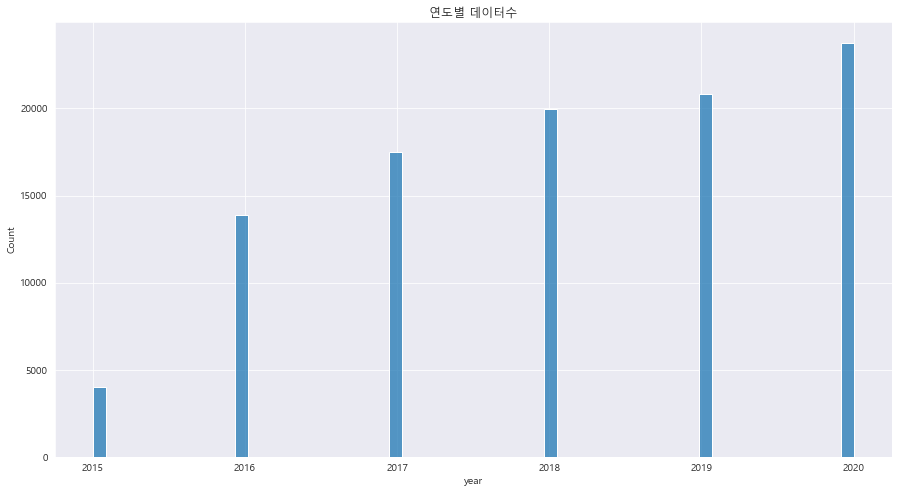

In [132]:
plt.figure(figsize = (15,8))
plt.title('연도별 데이터수')
sns.set_style("darkgrid")
sns.histplot(data=df, x="year")

## refund

In [16]:
pd.options.display.float_format = '{:.2f}'.format  # 지수표현 없이 출력
df['refund'].describe()

count     100000.00
mean      208142.24
std       307174.45
min     -8265000.00
25%        33000.00
50%        99000.00
75%       254000.00
max      7725000.00
Name: refund, dtype: float64

음수가 있어서 음수데이터를 확인해보았다

In [17]:
df[df['refund']<0].count()

age          15
gender       15
year         15
refund       15
fee          15
has_paid     15
income_근로    13
income_사업    15
income_기타     4
dtype: int64

15개가 있었다. 환급액이 음수가 나올 수 있는지 잘 모르겠는데 음수가 나온 데이터는 아래와 같다. 

In [18]:
df[df['refund']<0]

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
10034,34.00,M,2015,-231000.00,8500.00,True,8989000.00,1714000.00,nan
10624,25.00,F,2018,-7000.00,400.00,True,7508000.00,28000.00,nan
22506,32.00,F,2019,-5000.00,400.00,False,7118000.00,259000.00,nan
29515,41.00,F,2017,-10000.00,400.00,True,19718000.00,162000.00,128000.00
52648,26.00,F,2020,-397000.00,1300.00,False,8175000.00,247000.00,nan
52858,34.00,M,2017,-2328000.00,400.00,False,16759000.00,28000.00,441000.00
54256,48.00,F,2018,-948000.00,3000.00,True,8157000.00,3975000.00,nan
55168,28.00,F,2020,-1658000.00,1700.00,False,10509000.00,570000.00,nan
57756,38.00,F,2017,-107000.00,4300.00,True,16619000.00,737000.00,nan
68881,33.00,M,2016,-322000.00,400.00,True,nan,57000.00,nan


<AxesSubplot:xlabel='refund', ylabel='Count'>

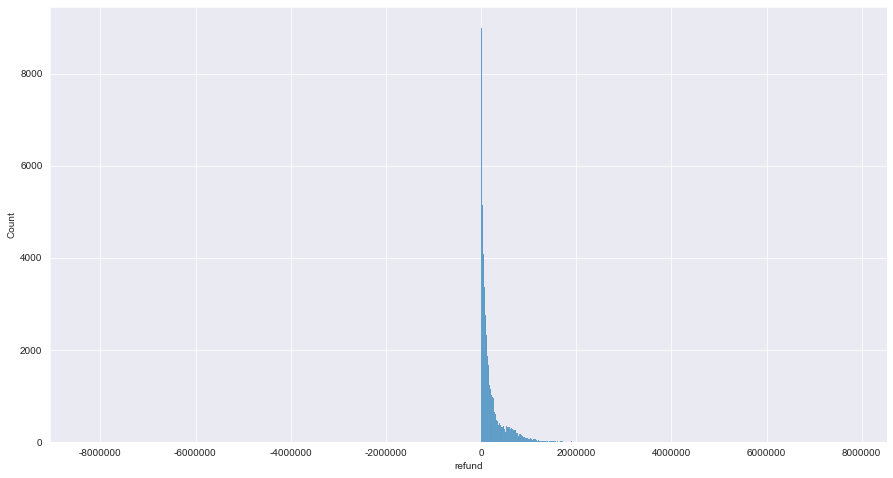

In [19]:
plt.figure(figsize = (15,8))
plt.ticklabel_format(style='plain', axis='x') #축 지수표현 변경
sns.histplot(data=df, x="refund")

환급액 데이터는 대부분 200만원 미만이고, 범위를 200만원 미만으로 확인해보았다.

<AxesSubplot:xlabel='refund', ylabel='Count'>

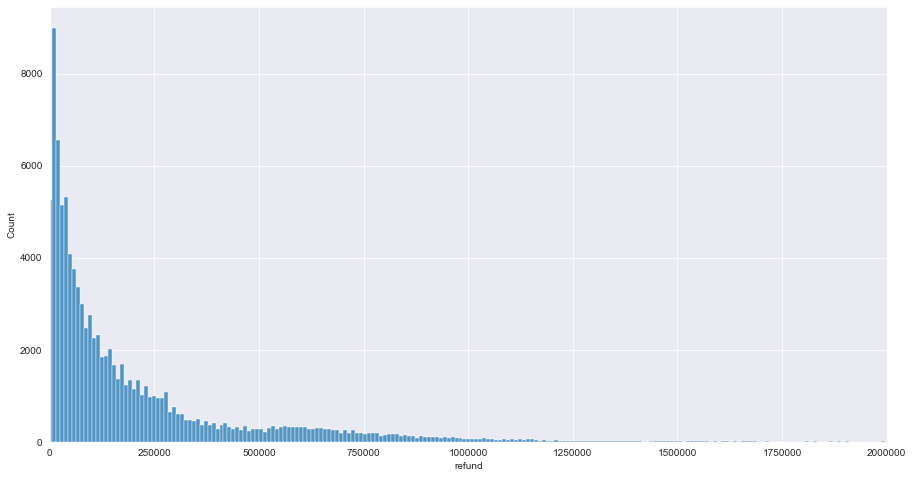

In [20]:
plt.figure(figsize = (15,8))
plt.ticklabel_format(style='plain', axis='x') #축 지수표현 변경
plt.xlim([0, 2000000])
sns.histplot(data=df, x="refund")

환급액 대비 수수료의 비율이 어떤지 확인해보았다.

In [5]:
df['수수료/환급액'] = df['fee']/df['refund']
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,수수료/환급액
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN,0.080000
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0,0.017000
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN,0.039792
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN,0.039512
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN,0.037719
...,...,...,...,...,...,...,...,...,...,...
99995,27.0,F,2019,301000.0,11900.0,True,NaN,NaN,680000.0,0.039535
99996,62.0,F,2019,77000.0,1300.0,True,NaN,463000.0,NaN,0.016883
99997,24.0,M,2020,9000.0,400.0,False,7923000.0,54000.0,NaN,0.044444
99998,24.0,M,2019,34000.0,400.0,True,NaN,204000.0,NaN,0.011765


수수료 비율이 높은 경우는 어떤 경우일까, 간단하게 다른 특성과 상관관계를 확인해보았다.

In [22]:
df['수수료/환급액'].describe()

count   100000.00
mean          nan
std           nan
min          -inf
25%          0.02
50%          0.03
75%          0.04
max           inf
Name: 수수료/환급액, dtype: float64

무한대 값이 나온 것이 있어서 확인해보았다.

In [23]:
df[df['수수료/환급액']==np.inf].count()

age          12
gender       12
year         12
refund       12
fee          12
has_paid     12
income_근로    11
income_사업    12
income_기타     3
수수료/환급액      12
dtype: int64

In [24]:
df[df['수수료/환급액']==np.inf]

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,수수료/환급액
8106,26.00,F,2019,0.00,4300.00,True,5254000.00,969000.00,nan,inf
19899,25.00,F,2016,0.00,400.00,True,8534000.00,80000.00,nan,inf
26659,43.00,F,2019,0.00,8500.00,True,11833000.00,1942000.00,647000.00,inf
39599,28.00,F,2016,0.00,400.00,True,nan,77000.00,nan,inf
42831,30.00,F,2016,0.00,400.00,True,13614000.00,213000.00,nan,inf
46703,28.00,F,2017,0.00,400.00,True,8539000.00,35000.00,51000.00,inf
47367,48.00,F,2019,0.00,400.00,True,6803000.00,179000.00,nan,inf
52661,29.00,F,2017,0.00,400.00,True,9124000.00,38000.00,nan,inf
78724,32.00,M,2018,0.00,400.00,True,1173000.00,49000.00,nan,inf
79651,33.00,F,2016,0.00,400.00,True,8496000.00,102000.00,nan,inf


In [25]:
df[df['수수료/환급액']==-np.inf].count()

age          49
gender       49
year         49
refund       49
fee          49
has_paid     49
income_근로     1
income_사업     2
income_기타     2
수수료/환급액      49
dtype: int64

In [26]:
df[df['수수료/환급액']==-np.inf]

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,수수료/환급액
1857,26.00,F,2019,-0.00,12800.00,False,nan,nan,nan,-inf
2642,26.00,M,2015,-0.00,4300.00,False,nan,nan,nan,-inf
2674,22.00,F,2019,-0.00,5100.00,True,nan,nan,349000.00,-inf
5131,25.00,F,2015,-0.00,4300.00,True,nan,nan,nan,-inf
5253,31.00,M,2015,-0.00,400.00,True,nan,nan,nan,-inf
6677,24.00,F,2015,-0.00,400.00,False,nan,nan,nan,-inf
10784,26.00,F,2015,-0.00,4300.00,False,nan,nan,nan,-inf
13000,32.00,M,2015,-0.00,400.00,False,nan,nan,nan,-inf
14212,58.00,F,2015,-0.00,400.00,True,nan,nan,nan,-inf
21224,24.00,M,2015,-0.00,12800.00,False,nan,nan,nan,-inf


환급액이 0원인데 수수료가 일정금액 산정이 되는 것이 있다. <br>수수료가 어떤 기준으로 산정이 되는지 알면 좋을 것 같다.<br> 환급액이 0이 값을 제외하고 수수료/환급액의 상관관계를 확인해보았다

In [27]:
df_0_drop = df.drop(df[df['refund']==0].index)
df_0_drop

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,수수료/환급액
0,27.00,F,2019,5000.00,400.00,False,10001000.00,61000.00,nan,0.08
1,34.00,M,2018,100000.00,1700.00,True,18092000.00,nan,1815000.00,0.02
2,28.00,F,2017,289000.00,11500.00,False,nan,1461000.00,nan,0.04
3,27.00,M,2019,410000.00,16200.00,False,nan,2471000.00,nan,0.04
4,26.00,F,2016,114000.00,4300.00,True,0.00,689000.00,nan,0.04
...,...,...,...,...,...,...,...,...,...,...
99995,27.00,F,2019,301000.00,11900.00,True,nan,nan,680000.00,0.04
99996,62.00,F,2019,77000.00,1300.00,True,nan,463000.00,nan,0.02
99997,24.00,M,2020,9000.00,400.00,False,7923000.00,54000.00,nan,0.04
99998,24.00,M,2019,34000.00,400.00,True,nan,204000.00,nan,0.01


In [28]:
df_0_drop.corrwith(df_0_drop['수수료/환급액'])

age          0.01
year         0.00
refund       0.00
fee          0.06
has_paid    -0.02
income_근로   -0.00
income_사업    0.03
income_기타    0.04
수수료/환급액      1.00
dtype: float64

수수료 비율과 상관관계 있는 것은 없다.

## fee

In [29]:
df['fee'].describe()

count   100000.00
mean      7247.64
std      11926.90
min        400.00
25%        400.00
50%       4300.00
75%       8500.00
max     307000.00
Name: fee, dtype: float64

<AxesSubplot:xlabel='fee', ylabel='Count'>

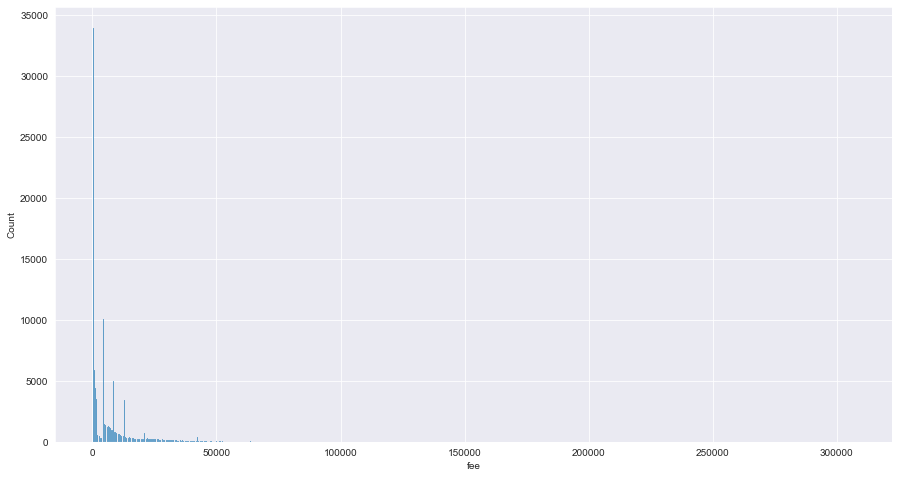

In [30]:
plt.figure(figsize = (15,8))
sns.histplot(data=df, x="fee")

수수료는 최대 307000원인데 대부분 50000원 밑으로 확인이 된다.

<AxesSubplot:xlabel='fee', ylabel='Count'>

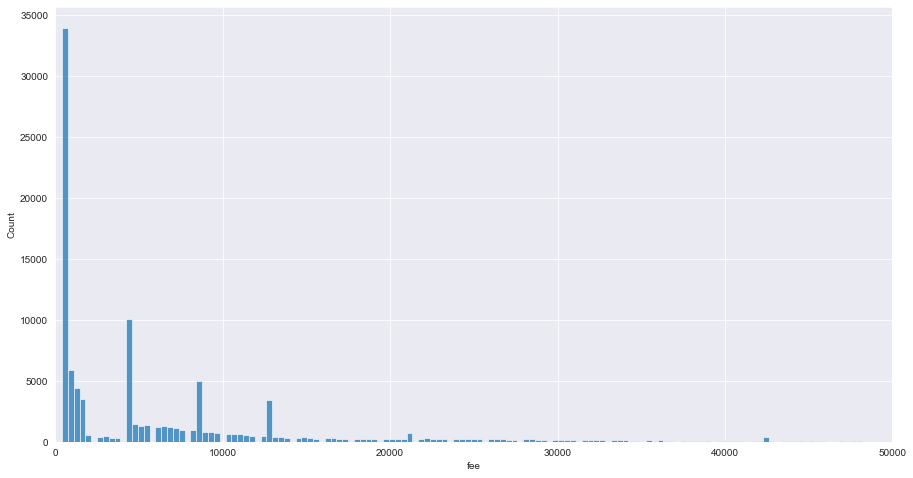

In [134]:
plt.figure(figsize = (15,8))
plt.xlim([0, 50000])
sns.histplot(data=df, x="fee")

## has_paid

In [33]:
df['has_paid'].value_counts()

True     64643
False    35357
Name: has_paid, dtype: int64

## income_근로	

In [26]:
df['income_근로'].isnull().sum()

59209

In [27]:
df['income_근로'].notnull().sum()

40791

In [28]:
df['income_근로'].describe()

count       40791.00
mean      6432596.97
std       6583715.82
min             0.00
25%       1616000.00
50%       4507000.00
75%       9301000.00
max     182335000.00
Name: income_근로, dtype: float64

In [29]:
df[df['income_근로']==0]

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,수수료/환급액
4,26.00,F,2016,114000.00,4300.00,True,0.00,689000.00,nan,0.04
114,25.00,M,2016,282000.00,12300.00,True,0.00,1698000.00,170000.00,0.04
215,24.00,F,2017,130000.00,5100.00,False,0.00,784000.00,nan,0.04
327,33.00,F,2016,673000.00,12800.00,True,0.00,5169000.00,nan,0.02
347,24.00,F,2018,123000.00,4700.00,True,0.00,740000.00,nan,0.04
...,...,...,...,...,...,...,...,...,...,...
99642,24.00,M,2016,8000.00,400.00,True,0.00,51000.00,nan,0.05
99651,24.00,F,2017,11000.00,400.00,False,0.00,64000.00,nan,0.04
99689,24.00,F,2020,447000.00,17400.00,True,0.00,2697000.00,19000.00,0.04
99918,22.00,F,2020,36000.00,400.00,True,0.00,nan,812000.00,0.01


In [30]:
df[df['income_근로']!=0]['income_근로'].isnull().sum()

59209

In [31]:
df[df['income_근로']!=0]['income_근로'].notnull().sum()

39892

In [32]:
39892+899

40791

null값과 0값이 존재한다. 두개의 의미가 다른걸까

<AxesSubplot:xlabel='income_근로', ylabel='Count'>

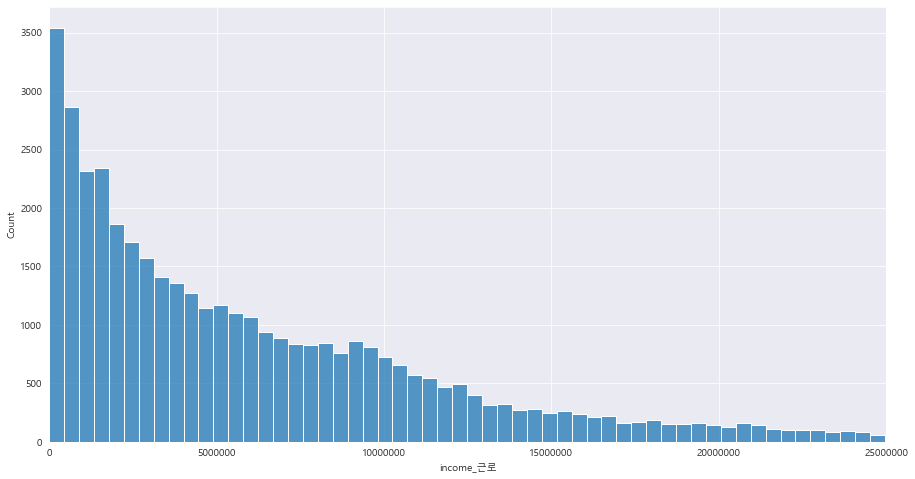

In [152]:
plt.figure(figsize = (15,8))
plt.ticklabel_format(style='plain', axis='x') #축 지수표현 변경
plt.xlim([0, 25000000])
sns.histplot(data=df, x="income_근로")

<AxesSubplot:xlabel='income_근로', ylabel='Count'>

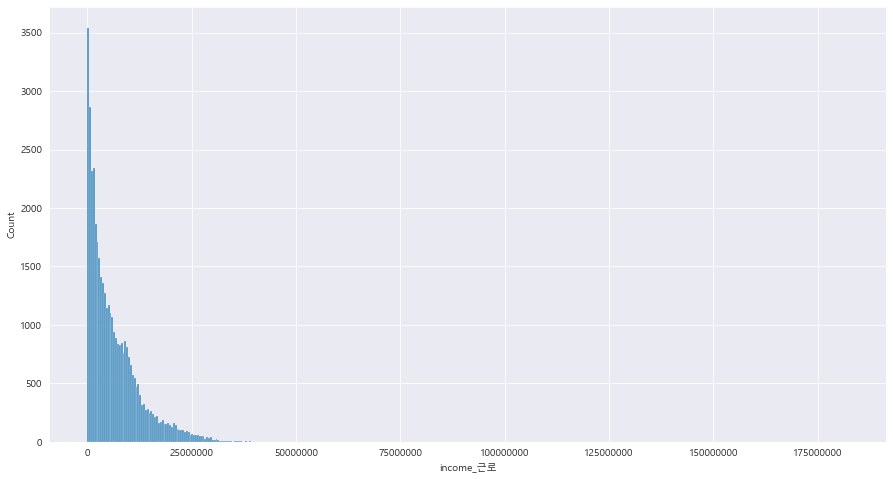

In [153]:
plt.figure(figsize = (15,8))
plt.ticklabel_format(style='plain', axis='x') #축 지수표현 변경
sns.histplot(data=df, x="income_근로")

## income_사업	

In [35]:
df['income_사업'].isnull().sum()

21773

In [36]:
df['income_사업'].notnull().sum()

78227

In [37]:
df['income_사업'].describe()

count      78227.00
mean     1511712.16
std      2449809.91
min            0.00
25%       177000.00
50%       619000.00
75%      1601000.00
max     39934000.00
Name: income_사업, dtype: float64

In [38]:
df[df['income_사업']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 670 to 97946
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        57 non-null     float64
 1   gender     57 non-null     object 
 2   year       57 non-null     int64  
 3   refund     57 non-null     float64
 4   fee        57 non-null     float64
 5   has_paid   57 non-null     bool   
 6   income_근로  35 non-null     float64
 7   income_사업  57 non-null     float64
 8   income_기타  25 non-null     float64
 9   수수료/환급액    57 non-null     float64
dtypes: bool(1), float64(7), int64(1), object(1)
memory usage: 4.5+ KB


<AxesSubplot:xlabel='income_사업', ylabel='Count'>

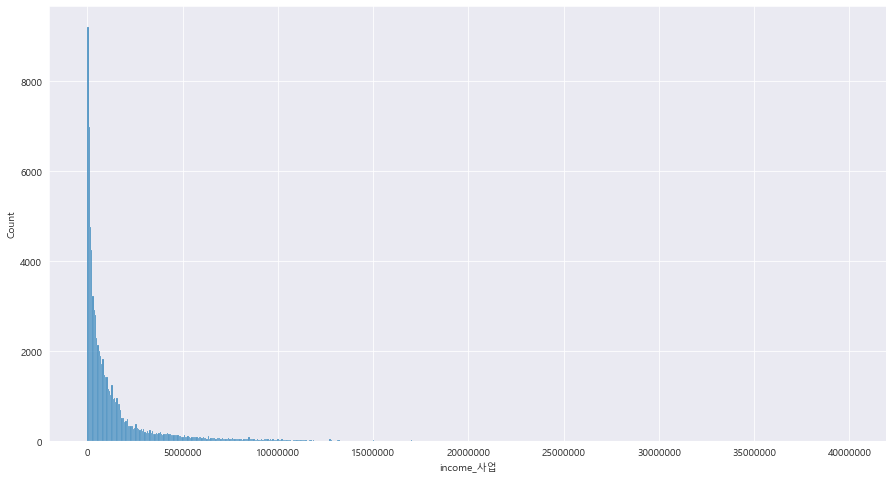

In [154]:
plt.figure(figsize = (15,8))
plt.ticklabel_format(style='plain', axis='x') #축 지수표현 변경
sns.histplot(data=df, x="income_사업")

<AxesSubplot:xlabel='income_사업', ylabel='Count'>

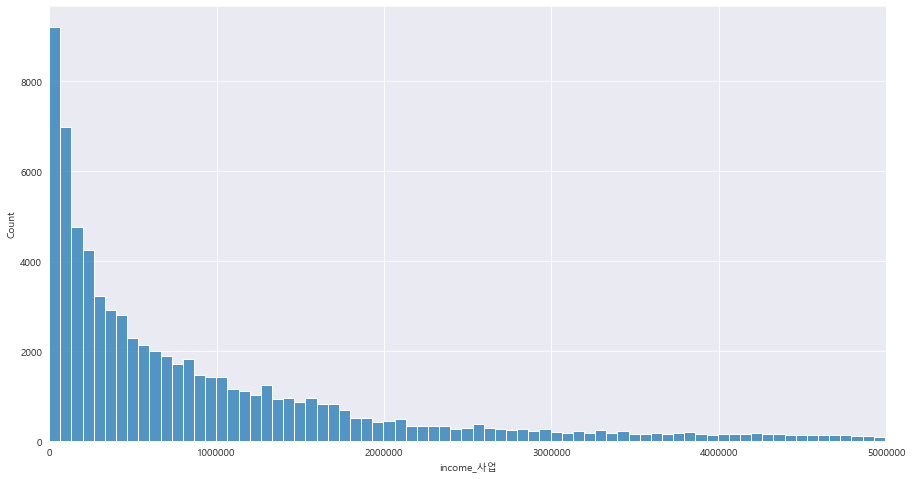

In [155]:
plt.figure(figsize = (15,8))
plt.ticklabel_format(style='plain', axis='x') #축 지수표현 변경
plt.xlim([0, 5000000])
sns.histplot(data=df, x="income_사업")

## income_기타


In [41]:
df['income_기타'].isnull().sum()

74740

In [42]:
df['income_기타'].notnull().sum()

25260

In [43]:
df['income_기타'].describe()

count      25260.00
mean      636283.41
std      1484947.39
min            0.00
25%        82000.00
50%       213000.00
75%       582000.00
max     62810000.00
Name: income_기타, dtype: float64

In [44]:
df[df['income_기타']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 1281 to 98713
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        148 non-null    float64
 1   gender     148 non-null    object 
 2   year       148 non-null    int64  
 3   refund     148 non-null    float64
 4   fee        148 non-null    float64
 5   has_paid   148 non-null    bool   
 6   income_근로  72 non-null     float64
 7   income_사업  146 non-null    float64
 8   income_기타  148 non-null    float64
 9   수수료/환급액    148 non-null    float64
dtypes: bool(1), float64(7), int64(1), object(1)
memory usage: 11.7+ KB


<AxesSubplot:xlabel='income_기타', ylabel='Count'>

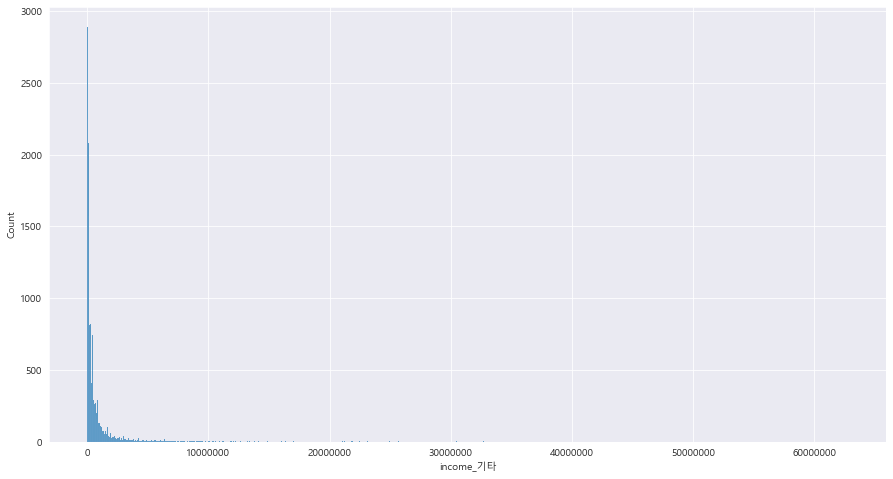

In [156]:
plt.figure(figsize = (15,8))
plt.ticklabel_format(style='plain', axis='x') #축 지수표현 변경
sns.histplot(data=df, x="income_기타")

<AxesSubplot:xlabel='income_기타', ylabel='Count'>

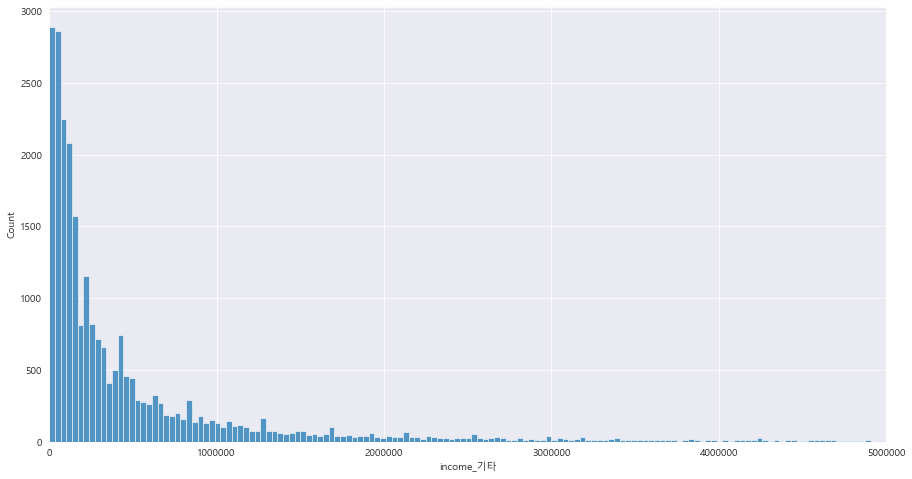

In [157]:
plt.figure(figsize = (15,8))
plt.ticklabel_format(style='plain', axis='x') #축 지수표현 변경
plt.xlim([0, 5000000])
sns.histplot(data=df, x="income_기타")

income 특성들에는 nan 값과 0 값이 공존하는데, income_사업 과 income_기타에는 0 값이 많지는 않지만 income_근로에는 0 값이 꽤있다. 각 특성별 nan 값과 0 값의 갯수는 다음과 같다.<br>

|구분|income_근로|income_사업|income_기타|
|--|--|--|--|
|nan|59209|21773|74740|
|0|899|57|148|

nan 값은 데이터가 아예없는 것 <br>
0 값은 0이라는 데이터가 있는 것으로 보는데 <br>두 값의 의미가 어떻게 다른지 생각해볼 필요가 있다.

## 상관관계

In [160]:
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,수수료/환급액
0,27.00,F,2019,5000.00,400.00,False,10001000.00,61000.00,nan,0.08
1,34.00,M,2018,100000.00,1700.00,True,18092000.00,nan,1815000.00,0.02
2,28.00,F,2017,289000.00,11500.00,False,nan,1461000.00,nan,0.04
3,27.00,M,2019,410000.00,16200.00,False,nan,2471000.00,nan,0.04
4,26.00,F,2016,114000.00,4300.00,True,0.00,689000.00,nan,0.04
...,...,...,...,...,...,...,...,...,...,...
99995,27.00,F,2019,301000.00,11900.00,True,nan,nan,680000.00,0.04
99996,62.00,F,2019,77000.00,1300.00,True,nan,463000.00,nan,0.02
99997,24.00,M,2020,9000.00,400.00,False,7923000.00,54000.00,nan,0.04
99998,24.00,M,2019,34000.00,400.00,True,nan,204000.00,nan,0.01


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   age        100000 non-null  float64
 1   gender     100000 non-null  object 
 2   year       100000 non-null  int64  
 3   refund     100000 non-null  float64
 4   fee        100000 non-null  float64
 5   has_paid   100000 non-null  bool   
 6   income_근로  40791 non-null   float64
 7   income_사업  78227 non-null   float64
 8   income_기타  25260 non-null   float64
 9   수수료/환급액    100000 non-null  float64
dtypes: bool(1), float64(7), int64(1), object(1)
memory usage: 7.0+ MB


In [123]:
df2 = df[['age','year','refund','fee','income_근로','income_사업','income_기타']]
df2

,age,year,refund,fee,income_근로,income_사업,income_기타
0,27.00,2019,5000.00,400.00,10001000.00,61000.00,nan
1,34.00,2018,100000.00,1700.00,18092000.00,nan,1815000.00
2,28.00,2017,289000.00,11500.00,nan,1461000.00,nan
3,27.00,2019,410000.00,16200.00,nan,2471000.00,nan
4,26.00,2016,114000.00,4300.00,0.00,689000.00,nan
...,...,...,...,...,...,...,...
99995,27.00,2019,301000.00,11900.00,nan,nan,680000.00
99996,62.00,2019,77000.00,1300.00,nan,463000.00,nan
99997,24.00,2020,9000.00,400.00,7923000.00,54000.00,nan
99998,24.00,2019,34000.00,400.00,nan,204000.00,nan


In [124]:
df2.corr()

,age,year,refund,fee,income_근로,income_사업,income_기타
age,1.00,-0.11,0.08,0.07,0.34,0.10,0.11
year,-0.11,1.00,0.14,0.17,0.08,0.15,0.04
refund,0.08,0.14,1.00,0.97,-0.11,0.79,0.74
fee,0.07,0.17,0.97,1.00,-0.11,0.78,0.74
income_근로,0.34,0.08,-0.11,-0.11,1.00,-0.09,0.04
income_사업,0.10,0.15,0.79,0.78,-0.09,1.00,0.07
income_기타,0.11,0.04,0.74,0.74,0.04,0.07,1.00


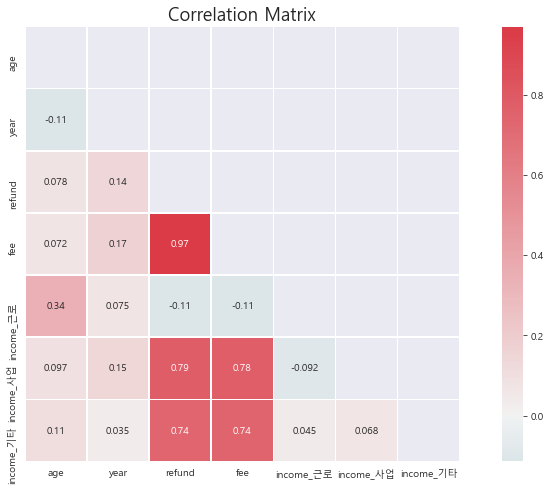

In [164]:
# sns.set(style="white")
corr = df2.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize = (15,8))
# f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True)
plt.show()

- fee 와 refund 의 상관관계가 가장 높다.
- income_사업 과 refund의 상관관계도 높은 편이다.
- income_사업 과 fee 의 상관관계도 높은 편이다.
- income_기타 과 refund의 상관관계도 높은 편이다.
- income_기타 과 fee 의 상관관계도 높은 편이다.

정리해보면
-> 
- refund 는 fee,income_사업,income_기타과 상관관계가 높고 income_근로와는 관계가 없다.
- fee는 refund,income_사업,income_기타과 상관관계가 높고 income_근로와는 관계가 없다.

# 전처리

* gender: 성별을 입력하지 않은 값 제거(22개)
* refund: 환급액 음수 제거(15개), 0값(12개), -0값(49개) 제거<br>
환급액이 0이 나올 수 있다고 생각하는데 그 수가 많지 않고 -0값이 더 많이 나온 것으로 봐서 이상값으로 판단

In [135]:
# gender: 성별을 입력하지 않은 값 제거
# refund: 환급액 음수제거
# income: 결측값 0으로 대체, 평균으로 대체해야하나..?
df_drop = df.drop(df[(df['gender']=='-')|(df['refund']<0)].index)
# df[['income_근로','income_사업','income_기타']] = df[['income_근로','income_사업','income_기타']].fillna(0)
df_drop

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,수수료/환급액
0,27.00,F,2019,5000.00,400.00,False,10001000.00,61000.00,nan,0.08
1,34.00,M,2018,100000.00,1700.00,True,18092000.00,nan,1815000.00,0.02
2,28.00,F,2017,289000.00,11500.00,False,nan,1461000.00,nan,0.04
3,27.00,M,2019,410000.00,16200.00,False,nan,2471000.00,nan,0.04
4,26.00,F,2016,114000.00,4300.00,True,0.00,689000.00,nan,0.04
...,...,...,...,...,...,...,...,...,...,...
99995,27.00,F,2019,301000.00,11900.00,True,nan,nan,680000.00,0.04
99996,62.00,F,2019,77000.00,1300.00,True,nan,463000.00,nan,0.02
99997,24.00,M,2020,9000.00,400.00,False,7923000.00,54000.00,nan,0.04
99998,24.00,M,2019,34000.00,400.00,True,nan,204000.00,nan,0.01


In [136]:
df_fill_0 = df_drop.copy()
df_fill_0[['income_근로','income_사업','income_기타']] = df_fill_0[['income_근로','income_사업','income_기타']].fillna(0)
df_fill_0

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,수수료/환급액
0,27.00,F,2019,5000.00,400.00,False,10001000.00,61000.00,0.00,0.08
1,34.00,M,2018,100000.00,1700.00,True,18092000.00,0.00,1815000.00,0.02
2,28.00,F,2017,289000.00,11500.00,False,0.00,1461000.00,0.00,0.04
3,27.00,M,2019,410000.00,16200.00,False,0.00,2471000.00,0.00,0.04
4,26.00,F,2016,114000.00,4300.00,True,0.00,689000.00,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...
99995,27.00,F,2019,301000.00,11900.00,True,0.00,0.00,680000.00,0.04
99996,62.00,F,2019,77000.00,1300.00,True,0.00,463000.00,0.00,0.02
99997,24.00,M,2020,9000.00,400.00,False,7923000.00,54000.00,0.00,0.04
99998,24.00,M,2019,34000.00,400.00,True,0.00,204000.00,0.00,0.01


# 결제여부 예측모델

결제여부를 예측해보고 영향을 많이 주는 특성의 상관관계를 고려해 고객을 타겟팅할 수 있을 것 같다.

## 랜덤포레스트(결측치 평균대체)

분류 모델로 여러가지가 있는데 랜덤포레스트로 먼저 실행을 해보았다.<br>
target은 has_paid<br>
features는 age,	gender,	year,	refund,	fee,	income_근로,	income_사업,	income_기타 로 하였다.<br>
수수료/환급액은 무한대값이 존재하여 제외하였다.


In [137]:
target = 'has_paid'

train, test = train_test_split(df_drop, train_size=0.80, test_size=0.20, 
                              stratify=df_drop[target], random_state=2)

train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=2)


train.shape, val.shape, test.shape

((63976, 10), (15994, 10), (19993, 10))

In [138]:
features = train.drop(columns=[target,'수수료/환급액']).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [139]:
X_train

,age,gender,year,refund,fee,income_근로,income_사업,income_기타
60845,30.00,M,2020,53000.00,900.00,3741000.00,nan,48000.00
75167,37.00,M,2016,16000.00,400.00,17703000.00,nan,230000.00
36654,28.00,M,2017,169000.00,6400.00,340000.00,1020000.00,nan
20910,27.00,F,2018,402000.00,8500.00,1833000.00,2420000.00,nan
47384,27.00,M,2020,100000.00,1700.00,nan,602000.00,nan
...,...,...,...,...,...,...,...,...
89735,25.00,F,2018,111000.00,4300.00,nan,nan,nan
40046,32.00,F,2019,7000.00,400.00,5649000.00,43000.00,nan
64797,33.00,M,2018,24000.00,400.00,16821000.00,nan,85000.00
74524,26.00,F,2017,107000.00,4300.00,1743000.00,646000.00,nan


In [140]:
y_train

60845    False
75167    False
36654    False
20910     True
47384     True
         ...  
89735     True
40046    False
64797    False
74524     True
40379     True
Name: has_paid, Length: 63976, dtype: bool

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [141]:
pipe = make_pipeline(
    OneHotEncoder(use_cat_names = True), 
    SimpleImputer(),  
    StandardScaler(),                       
    RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
)

#대부분 특성의 데이터 분포가 낮은값에 몰려있고 불균형하고 최대값 최소값 차이가 많이나서 정규화 표준화를 해주었다.
pipe.named_steps

{'onehotencoder': OneHotEncoder(use_cat_names=True),
 'simpleimputer': SimpleImputer(),
 'standardscaler': StandardScaler(),
 'randomforestclassifier': RandomForestClassifier(n_jobs=-1, random_state=2)}

In [142]:
from sklearn.metrics import classification_report
# train 학습, 검증셋 정확도
pipe.fit(X_train, y_train)
print('검증 정확도', pipe.score(X_val, y_val))

print(classification_report(y_val, pipe.predict(X_val)))


검증 정확도 0.6973865199449794
              precision    recall  f1-score   support

       False       0.59      0.47      0.52      5653
        True       0.74      0.82      0.78     10341

    accuracy                           0.70     15994
   macro avg       0.66      0.65      0.65     15994
weighted avg       0.69      0.70      0.69     15994



False 로 예측한 것 중 실제로 False 인 것은 59% <br>
True 로 예측한 것 중 실제로 True 인 것은 74% <br>
실제 False 값 중 제대로 예측된 것은 49% <br>
실제 True 값 중 제대로 예측된 것은 81% <br>

has_paid 의 값 비율이 0.64 인것을 감안하면 성능이 거의 나오지 않는다.


## 랜덤포레스트(결측값 0 대체)

In [143]:
target = 'has_paid'

train, test = train_test_split(df_fill_0, train_size=0.80, test_size=0.20, 
                              stratify=df_fill_0[target], random_state=2)

train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=2)


train.shape, val.shape, test.shape

((63976, 10), (15994, 10), (19993, 10))

In [144]:
features = train.drop(columns=[target,'수수료/환급액']).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [145]:
X_train

,age,gender,year,refund,fee,income_근로,income_사업,income_기타
60845,30.00,M,2020,53000.00,900.00,3741000.00,0.00,48000.00
75167,37.00,M,2016,16000.00,400.00,17703000.00,0.00,230000.00
36654,28.00,M,2017,169000.00,6400.00,340000.00,1020000.00,0.00
20910,27.00,F,2018,402000.00,8500.00,1833000.00,2420000.00,0.00
47384,27.00,M,2020,100000.00,1700.00,0.00,602000.00,0.00
...,...,...,...,...,...,...,...,...
89735,25.00,F,2018,111000.00,4300.00,0.00,0.00,0.00
40046,32.00,F,2019,7000.00,400.00,5649000.00,43000.00,0.00
64797,33.00,M,2018,24000.00,400.00,16821000.00,0.00,85000.00
74524,26.00,F,2017,107000.00,4300.00,1743000.00,646000.00,0.00


In [146]:
y_train

60845    False
75167    False
36654    False
20910     True
47384     True
         ...  
89735     True
40046    False
64797    False
74524     True
40379     True
Name: has_paid, Length: 63976, dtype: bool

In [147]:
pipe = make_pipeline(
    OneHotEncoder(use_cat_names = True), 
    StandardScaler(),                       
    RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
)

#대부분 특성의 데이터 분포가 낮은값에 몰려있고 불균형하고 최대값 최소값 차이가 많이나서 정규화 표준화를 해주었다.
pipe.named_steps

{'onehotencoder': OneHotEncoder(use_cat_names=True),
 'standardscaler': StandardScaler(),
 'randomforestclassifier': RandomForestClassifier(n_jobs=-1, random_state=2)}

In [148]:
from sklearn.metrics import classification_report
# train 학습, 검증셋 정확도
pipe.fit(X_train, y_train)
print('검증 정확도', pipe.score(X_val, y_val))

print(classification_report(y_val, pipe.predict(X_val)))


검증 정확도 0.6945729648618232
              precision    recall  f1-score   support

       False       0.58      0.47      0.52      5653
        True       0.74      0.82      0.78     10341

    accuracy                           0.69     15994
   macro avg       0.66      0.64      0.65     15994
weighted avg       0.68      0.69      0.69     15994



## has_paid 가 true가 되는데에는 어떤 특성이 영향을 많이 주었나?

In [215]:
# # 특성 중요도
# 특성중요도: 각각 특성을 모든 트리에 대해 평균불순도감소(mean decrease impurity)를 계산한 값입니다.
# rf = pipe.named_steps['randomforestclassifier']
# enc = pipe.named_steps['onehotencoder']
# encoded_columns = enc.transform(X_val).columns
# importances = pd.Series(rf.feature_importances_, encoded_columns)

# plt.figure(figsize=(10,8))
# plt.title('Feature Importances')
# importances.sort_values().plot.barh();

# income_사업, refund, age, income_근로, year, income_기타, fee, gender 순으로 중요도가 나왔고, 성별은 거의 무의미 하다. 

# 불확실한 것 같아서 제외

Permutation Importance: 중요도 측정은 관심있는 특성에만 무작위로 노이즈를 주고 예측을 하였을 때 성능 평가지표(정확도, F1, $R^2$ 등)가 얼마나 감소하는지를 측정합니다.

In [149]:
from sklearn.pipeline import Pipeline

pipe2 = Pipeline([
    ('preprocessing', make_pipeline(OneHotEncoder(), SimpleImputer(), StandardScaler())),
    ('rf', RandomForestClassifier(n_estimators=10, random_state=2, n_jobs=-1)) 
])

pipe2.named_steps

{'preprocessing': Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                 ('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 'rf': RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=2)}

In [150]:
pipe2.fit(X_train, y_train)
print('검증 정확도: ', pipe2.score(X_val, y_val))

검증 정확도:  0.6800050018757033


In [151]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe2.named_steps['rf'], # model
    scoring='accuracy', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_val_transformed = pipe2.named_steps['preprocessing'].transform(X_val)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_transformed, y_val);

In [152]:
enc = pipe.named_steps['onehotencoder']
encoded_columns = enc.transform(X_val).columns

pd.Series(permuter.feature_importances_, encoded_columns).sort_values()

gender_F    -0.00
gender_M    -0.00
refund       0.01
age          0.01
income_근로    0.01
fee          0.01
income_기타    0.02
year         0.04
income_사업    0.09
dtype: float64

In [153]:
feature_names = encoded_columns.tolist()
feature_names

['age',
 'gender_M',
 'gender_F',
 'year',
 'refund',
 'fee',
 'income_근로',
 'income_사업',
 'income_기타']

In [154]:
# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0944 ± 0.0032,income_사업
0.0380 ± 0.0040,year
0.0170 ± 0.0033,income_기타
0.0086 ± 0.0039,fee
0.0073 ± 0.0047,income_근로
0.0061 ± 0.0030,age
0.0057 ± 0.0030,refund
-0.0030 ± 0.0022,gender_M
-0.0035 ± 0.0014,gender_F


income_사업, year, fee, income_기타, refund, age, income_근로, gender 순으로 중요도가 나왔고, 성별은 거의 무의미 하다.<br>

## has_paid 그룹별 통계 

In [34]:
# has_paid 그룹별 연령차이
df['age'].groupby(df['has_paid']).describe()

,count,mean,std,min,25%,50%,75%,max
has_paid,,,,,,,,
False,35357.00,29.24,7.88,16.00,24.00,27.00,32.00,78.00
True,64643.00,28.87,7.70,15.00,24.00,27.00,31.00,81.00


결제에 따른 연령 차이는 거의 없다

In [35]:
# has_paid 그룹별 성별 차이
df['gender'].groupby(df['has_paid']).value_counts()

has_paid  gender
False     F         18114
          M         17225
          -            18
True      M         33252
          F         31387
          -             4
Name: gender, dtype: int64

성별 차이도 거의 없다.

In [121]:
# 연도별 has_paid 차이
df['year'].groupby(df['has_paid']).value_counts().sort_index()

has_paid  year
False     2015     1153
          2016     4215
          2017     5291
          2018     6095
          2019     6361
          2020    12242
True      2015     2832
          2016     9698
          2017    12204
          2018    13888
          2019    14481
          2020    11540
Name: year, dtype: int64

<AxesSubplot:xlabel='year', ylabel='Count'>

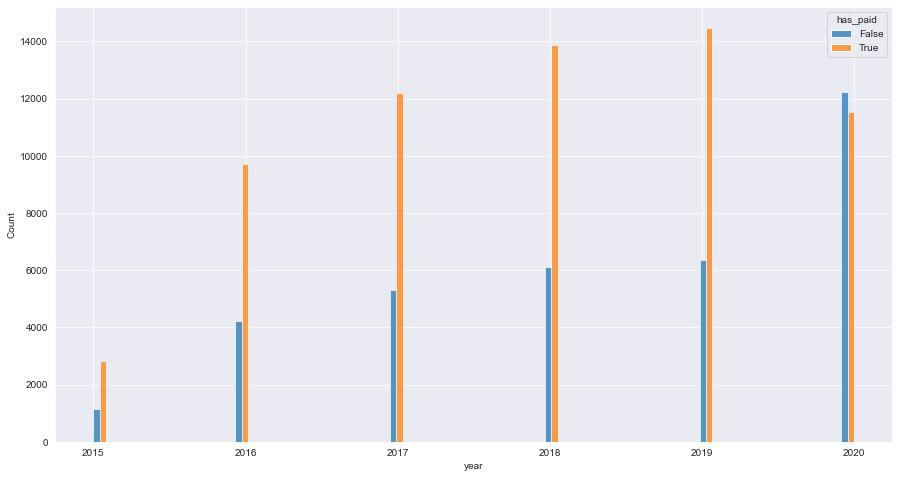

In [139]:
plt.figure(figsize = (15,8))
sns.set_style("darkgrid")
sns.histplot(data=df, x="year",hue='has_paid', multiple="dodge")

2020년 결제 비율이 눈에띄게 줄어들었다.

In [122]:
# has_paid 그룹별 refund 차이
df['refund'].groupby(df['has_paid']).describe()

,count,mean,std,min,25%,50%,75%,max
has_paid,,,,,,,,
False,35357.00,247209.80,379554.13,-2328000.00,28000.00,110000.00,304000.00,7608000.00
True,64643.00,186773.93,256670.73,-8265000.00,34000.00,94000.00,232000.00,7725000.00


<AxesSubplot:xlabel='refund', ylabel='Count'>

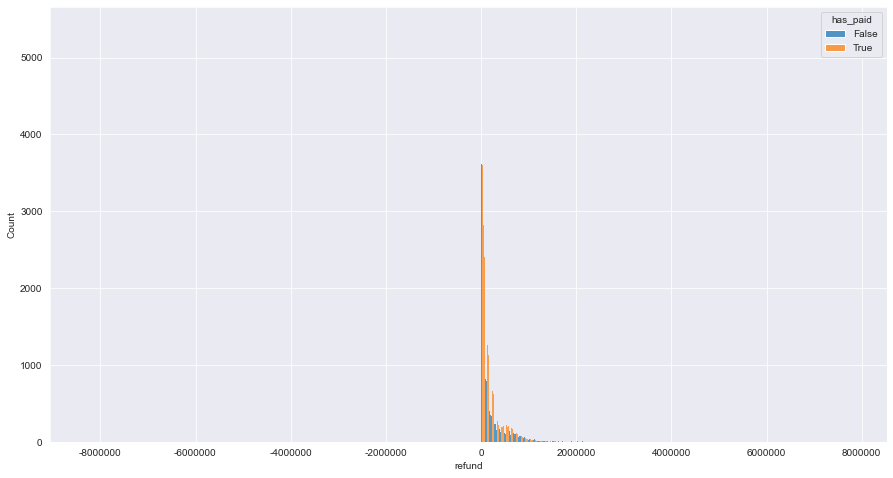

In [135]:
plt.figure(figsize = (15,8))
plt.ticklabel_format(style='plain', axis='x') #축 지수표현 변경
sns.histplot(data=df, x="refund",hue='has_paid', multiple="dodge")

<AxesSubplot:xlabel='refund', ylabel='Count'>

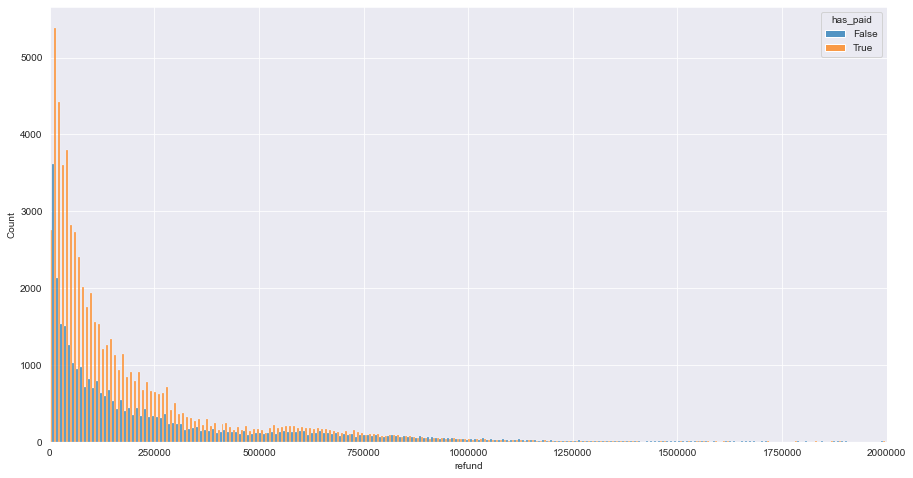

In [144]:
plt.figure(figsize = (15,8))
plt.ticklabel_format(style='plain', axis='x') #축 지수표현 변경
plt.xlim([0, 2000000])
sns.histplot(data=df, x="refund",hue='has_paid', multiple="dodge")


환급액의 평균은 결제여부가 True 인 경우에 낮게 나왔고, 그 이유는 낮은 환급액일수록 결제비중이 높기 때문이다.

In [123]:
# has_paid 그룹별 fee 차이
df['fee'].groupby(df['has_paid']).describe()

,count,mean,std,min,25%,50%,75%,max
has_paid,,,,,,,,
False,35357.00,9145.68,15078.07,400.00,400.00,4300.00,11500.00,302300.00
True,64643.00,6209.49,9626.05,400.00,400.00,3000.00,8500.00,307000.00


<AxesSubplot:xlabel='fee', ylabel='Count'>

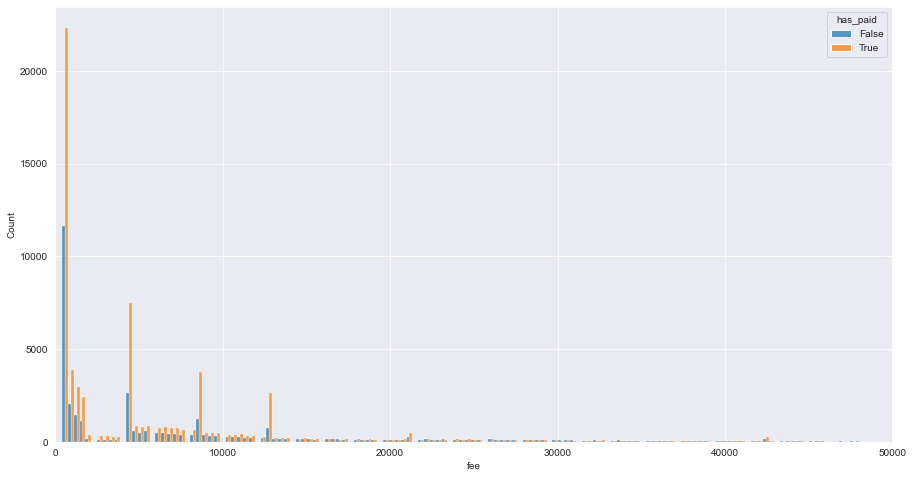

In [147]:
plt.figure(figsize = (15,8))
plt.xlim([0, 50000])
sns.histplot(data=df, x="fee",hue='has_paid', multiple="dodge")

수수료도 낮을수록 결제비중이 높았다.

In [124]:
# has_paid 그룹별 income_근로 통계
df['income_근로'].groupby(df['has_paid']).describe()

,count,mean,std,min,25%,50%,75%,max
has_paid,,,,,,,,
False,12257.00,6579095.05,6624810.83,0.00,1616000.00,4596000.00,9678000.00,164883000.00
True,28534.00,6369667.59,6565097.00,0.00,1616000.00,4464000.00,9177750.00,182335000.00


근로소득은 결제여부에 따른 차이가 거의없다.

In [125]:
# has_paid 그룹별 income_사업 통계
df['income_사업'].groupby(df['has_paid']).describe()

,count,mean,std,min,25%,50%,75%,max
has_paid,,,,,,,,
False,22739.00,1909495.80,2986189.92,0.00,142500.00,721000.00,2176000.00,21224000.00
True,55488.00,1348700.30,2171499.43,0.00,191000.00,588000.00,1456000.00,39934000.00


<AxesSubplot:xlabel='income_사업', ylabel='Count'>

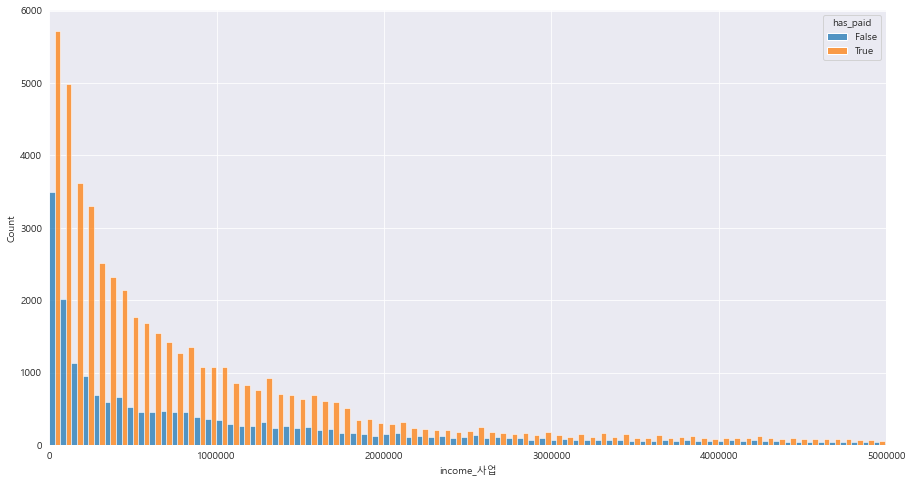

In [158]:
plt.figure(figsize = (15,8))
plt.ticklabel_format(style='plain', axis='x') #축 지수표현 변경
plt.xlim([0, 5000000])
sns.histplot(data=df, x="income_사업",hue='has_paid', multiple="dodge")

In [126]:
# has_paid 그룹별 income_기타 통계
df['income_기타'].groupby(df['has_paid']).describe()

,count,mean,std,min,25%,50%,75%,max
has_paid,,,,,,,,
False,8576.00,861408.23,1897756.34,0.00,85000.00,250000.00,777250.00,62810000.00
True,16684.00,520563.53,1203331.33,0.00,76000.00,190500.00,510000.00,33235000.00


<AxesSubplot:xlabel='income_기타', ylabel='Count'>

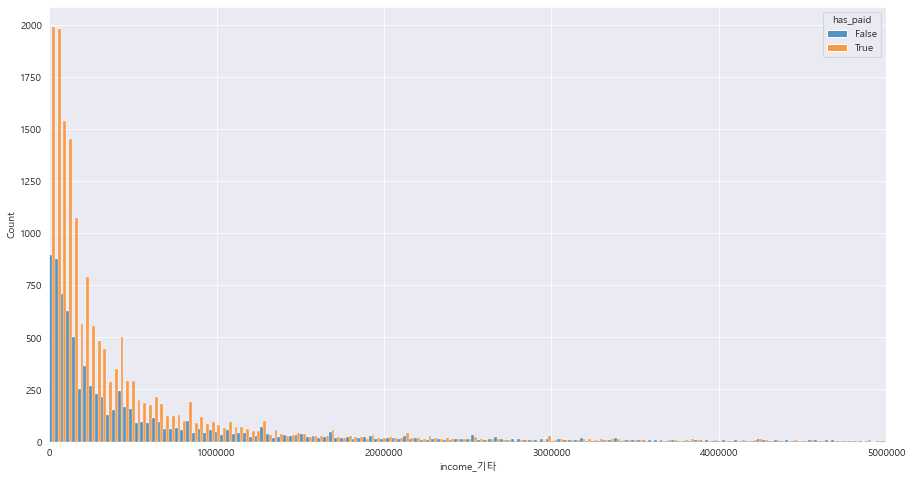

In [159]:
plt.figure(figsize = (15,8))
plt.ticklabel_format(style='plain', axis='x') #축 지수표현 변경
plt.xlim([0, 5000000])
sns.histplot(data=df, x="income_기타",hue='has_paid', multiple="dodge")

In [128]:
# has_paid 그룹별 통계
df_0_drop['수수료/환급액'].groupby(df_0_drop['has_paid']).describe()

,count,mean,std,min,25%,50%,75%,max
has_paid,,,,,,,,
False,35325.00,0.04,0.06,-0.08,0.02,0.04,0.04,4.27
True,64614.00,0.03,0.10,-0.06,0.02,0.03,0.04,15.95


income_사업, year, fee, income_기타, refund, age, income_근로, gender 순으로 중요도가 나왔고, 성별은 거의 무의미 하다.<br>
그룹별 통계를 하였을 때 income_사업, year, fee, income_기타, refund 이 차이를 보였다.

- income_사업에 가장 큰 영향을 받는데, income_사업 금액이 낮을수록 결제를 많이 하였다.<br>
- year 데이터에 따라 결제여부의 영향을 많이 주는데 2020년에 결제비율이 많이 떨어져서 그런 것 같다. 2020년 고객의 결제 하락의 원인을 파악하여 보완을 해야할 것 같다.<br>
    - 2020년에 데이터(조회)건수는 늘었는데 왜 결제(환급)는 하지 않았을까?
- fee 는 낮을수록 결제를 많이 하였다.
- income_기타도 낮을수록 결제를 많이 하였다.
- age, income_근로, gender 는 영향을 주지 않는 것 같다.

In [174]:
# 2020년 데이터 확인하기

# 2020년 income_사업 또는 income_기타 데이터가 줄었을 경우
# 2020년 income_사업 또는 income_기타 데이터 금액이 높아진 경우
# 2020년 refund이 오른 경우
# 2020년 fee이 오른 경우

In [175]:
# 2020년 income_사업 또는 income_기타 데이터 수 비교
df.groupby(df['year']).count()

,age,gender,refund,fee,has_paid,income_근로,income_사업,income_기타,수수료/환급액
year,,,,,,,,,
2015,3985,3985,3985,3985,3985,238,2399,369,3985
2016,13913,13913,13913,13913,13913,4984,10636,3335,13913
2017,17495,17495,17495,17495,17495,6665,13540,4209,17495
2018,19983,19983,19983,19983,19983,7894,15227,5223,19983
2019,20842,20842,20842,20842,20842,9269,15944,5543,20842
2020,23782,23782,23782,23782,23782,11741,20481,6581,23782


In [177]:
# 2020년 income_사업 데이터 금액 비교
df[['income_사업']].groupby(df['year']).describe()

income_사업                                                            \
         count       mean        std  min       25%       50%        75%   
year                                                                       
2015   2399.00 1190697.37 1856827.37 0.00 177000.00 526000.00 1330500.00   
2016  10636.00 1184564.59 1921972.58 0.00 150000.00 504000.00 1327000.00   
2017  13540.00 1234388.11 1990298.54 0.00 160000.00 534000.00 1366000.00   
2018  15227.00 1246838.25 2007126.62 0.00 164000.00 550000.00 1375500.00   
2019  15944.00 1174407.24 1890550.05 0.00 172000.00 553000.00 1299250.00   
2020  20481.00 2362053.85 3350117.59 0.00 244000.00 979000.00 2950000.00   

                  
             max  
year              
2015 18073000.00  
2016 20408000.00  
2017 20893000.00  
2018 22031000.00  
2019 19982000.00  
2020 39934000.00

In [178]:
# 2020년 income_기타 데이터 금액이 비교
df[['income_기타']].groupby(df['year']).describe()

income_기타                                                         \
         count      mean        std  min      25%       50%       75%   
year                                                                    
2015    369.00 353550.14  648311.12 0.00 43000.00 116000.00 383000.00   
2016   3335.00 631957.72 1371243.75 0.00 85000.00 213000.00 595000.00   
2017   4209.00 626396.77 1188213.51 0.00 85000.00 224000.00 621000.00   
2018   5223.00 590564.81 1413660.74 0.00 77000.00 202000.00 547000.00   
2019   5543.00 510586.33 1160474.44 0.00 72000.00 172000.00 506000.00   
2020   6581.00 802807.48 1953989.15 0.00 84000.00 213000.00 680000.00   

                  
             max  
year              
2015  6378000.00  
2016 30470000.00  
2017 21258000.00  
2018 32714000.00  
2019 33235000.00  
2020 62810000.00

In [168]:
# 2020년 refund 데이터 금액 비교

df[['refund']].groupby(df['year']).describe()

refund                                                               \
        count      mean       std         min      25%       50%       75%   
year                                                                         
2015  3985.00 162656.21 229204.09  -231000.00 23000.00  78000.00 205000.00   
2016 13913.00 171084.24 243632.17  -322000.00 27000.00  83000.00 213000.00   
2017 17495.00 176735.47 249406.77 -2328000.00 28000.00  87000.00 221000.00   
2018 19983.00 179430.42 272303.98 -8265000.00 28000.00  88000.00 222000.00   
2019 20842.00 173935.23 257723.45    -5000.00 30000.00  89000.00 212000.00   
2020 23782.00 314651.46 414765.77 -1658000.00 52000.00 159000.00 453000.00   

                 
            max  
year             
2015 2561000.00  
2016 4911000.00  
2017 6254000.00  
2018 7725000.00  
2019 6255000.00  
2020 6815000.00

In [169]:
# 2020년 fee 데이터 금액 비교
df[['fee']].groupby(df['year']).describe()

fee                                                           
        count     mean      std    min    25%     50%      75%       max
year                                                                    
2015  3985.00  4396.46  6440.17 400.00 400.00 3000.00  4300.00  63800.00
2016 13913.00  5579.75  9018.24 400.00 400.00 1700.00  8100.00 195200.00
2017 17495.00  5852.21  9379.07 400.00 400.00 1700.00  8500.00 248300.00
2018 19983.00  5994.83 10094.04 400.00 400.00 2100.00  8500.00 307000.00
2019 20842.00  5831.38  9829.98 400.00 400.00 2100.00  8100.00 248700.00
2020 23782.00 12021.54 16683.57 400.00 900.00 6000.00 17900.00 270800.00

2020년에 수수료와 환급액이 커졌고, 사업소득과 기타소득이 커졌다.
사업소득과 기타소득이 높은 경우가 많았고 환급액과 수수료도 크게 나온 것 같다.

연도의 영향은 결국 사업소득과 기타소득에 의한 것이었고
종합해보면 사업소득과 기타소득이 클수록 결제확률이 떨어지는 것으로 수렴하는 것 같다.

사업소득이나 기타소득이 높은 사람들은 왜 환급을 받지 않을까?<br>
-> (예상) 수입이 많고 일을 많이 해보면서 종합소득세 신고에 익숙하여 종합소득세 신고때 하려고?, 대신 처리해주는 사람이 있다거나

그러면 얼마 이하의 소득인 사람을 타겟으로 하면 좋을까?<br>
-> 그룹별 통계를 보았을 때 결제비율의 차이가 두드러지는 사업소득은 2,000,000원 이하, 기타소득은 1,000,000원 이하 고객을 집중 타겟으로 한다.

고소득 데이터 자체가 부족한데 홍보가 더 필요하진 않을까?<br>
-> 소득분포와 비교하여 홍보가 부족한 것인지 비율자체가 적은것인지 확인해보았다.


## 특성선택(생략)

In [119]:
## SelectKBest
from sklearn.feature_selection import SelectKBest,f_regression

## selctor 정의합니다.
selector = SelectKBest(score_func=f_regression,k='all')

## 학습데이터에 fit_transform 

encoder = OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_train_selected = selector.fit_transform(X_train_encoded, y_train)

## 테스트 데이터는 transform
X_val_selected = selector.transform(X_val_encoded)


X_train_selected.shape, X_val_selected.shape

((63946, 9), (15987, 9))

In [120]:
all_names = X_train_encoded.columns

## selector.get_support()
selected_mask = selector.get_support()

## 선택된 특성들
selected_names = all_names[selected_mask]

## 선택되지 않은 특성들
unselected_names = all_names[~selected_mask] 

print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)

Selected names:  Index(['age', 'gender_F', 'gender_M', 'year', 'refund', 'fee', 'income_근로',
       'income_사업', 'income_기타'],
      dtype='object')
Unselected names:  Index([], dtype='object')


1 features
Selected names:  Index(['year'], dtype='object')
Test MAE: 0.4488
Test R2: 0.014277251850890127 

2 features
Selected names:  Index(['year', 'fee'], dtype='object')
Test MAE: 0.4450
Test R2: 0.021971311336405397 

3 features
Selected names:  Index(['year', 'refund', 'fee'], dtype='object')
Test MAE: 0.4433
Test R2: 0.026130137946144827 

4 features
Selected names:  Index(['year', 'refund', 'fee', 'income_근로'], dtype='object')
Test MAE: 0.4419
Test R2: 0.028967413158617727 

5 features
Selected names:  Index(['year', 'refund', 'fee', 'income_근로', 'income_기타'], dtype='object')
Test MAE: 0.4418
Test R2: 0.0289936788918147 

6 features
Selected names:  Index(['gender_F', 'year', 'refund', 'fee', 'income_근로', 'income_기타'], dtype='object')
Test MAE: 0.4416
Test R2: 0.029618896919613058 

7 features
Selected names:  Index(['gender_F', 'gender_M', 'year', 'refund', 'fee', 'income_근로',
       'income_기타'],
      dtype='object')
Test MAE: 0.4416
Test R2: 0.02961889691951969 

8 featur

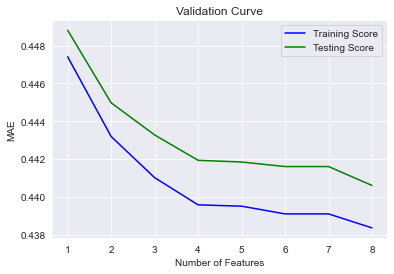

In [121]:
# features를 몇 개 선책하는 것이 좋은지 알아 봅시다.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

training = []
testing = []
ks = range(1, len(X_train.columns)+1)

# 1 부터 특성 수 만큼 사용한 모델을 만들어서 MAE 값을 비교 합니다.
for k in range(1, len(X_train.columns)+ 1):
    print(f'{k} features')
    
    selector = SelectKBest(score_func=f_regression, k=k)
    
    X_train_selected = selector.fit_transform(X_train_encoded, y_train)
    X_val_selected = selector.transform(X_val_encoded)
    
    all_names = X_train_encoded.columns
    selected_mask = selector.get_support()
    selected_names = all_names[selected_mask]
    print('Selected names: ', selected_names)

    
    model = LinearRegression()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_train_selected)
    mae = mean_absolute_error(y_train, y_pred)
    training.append(mae)
    
    y_pred = model.predict(X_val_selected)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    testing.append(mae)
    print(f'Test MAE: {mae:,.4f}')
    print(f'Test R2: {r2} \n')

plt.plot(ks, training, label='Training Score', color='b')
plt.plot(ks, testing, label='Testing Score', color='g')
plt.ylabel("MAE")
plt.xlabel("Number of Features")
plt.title('Validation Curve')
plt.legend()
plt.show()

# 수수료 결제금액의 합

1. 결제 건의 증가<br>
        -> 결제가 이루어진 경우, 새로운 유입 유도
        -> 결제가 이루어지지 않은 경우, 결제 유도(원인 파악 요구됨)
        
    결제건의 증가는 앞에서 살펴본 결제여부에 영향을 주는 특성을 참고하여 새로운 고객 유입과 결제 유도를 할 수 있을 것이다.<br>
    결제 여부에 영향을 주는 특성은 income_사업,income_기타 을 볼 수 있을 것 같다.

    income_사업, year, fee, income_기타, refund 가 유의미한 차이를 보였지만, <br>year 특성은 살펴본 결과 2020년에 income_사업과 income_기타 금액이 큰 경우가 많았고 그로 인해 예측결과에 영향을 준 것이어서 제외한다. <br>fee 와 refund 도 사업소득과 기타소득에 의해 값이 정해지기 때문에 상관관계가 높아서 제외한다.

    사업소득과 기타소득이 낮은 고객이 결제를 많이 하기 때문에 해당 고객을 타겟으로 새로운 유입을 유도한다.
<br><br>
2. 높은 건당 수수료<br>
        -> 높은 결제 수수료를 갖는 고객 특성 파악, 유입 유도
    
    수수료가 큰 경우는 환급액이 큰 경우이고, 환급액은 income_사업 또는 income_기타가 큰 경우이다.
    사업과 기타소득이 높은 고객의 유입을 늘리는 것을 생각해볼 수 있다.

    하지만 income_사업 또는 income_기타가 높을수록 결제여부는 이루어지지 않았다. 유입이 증가하더라도 결제로 이어지지 않는 것이 많으니 결제가 이루어지지 않는 원인을 파악할 필요가 있다.

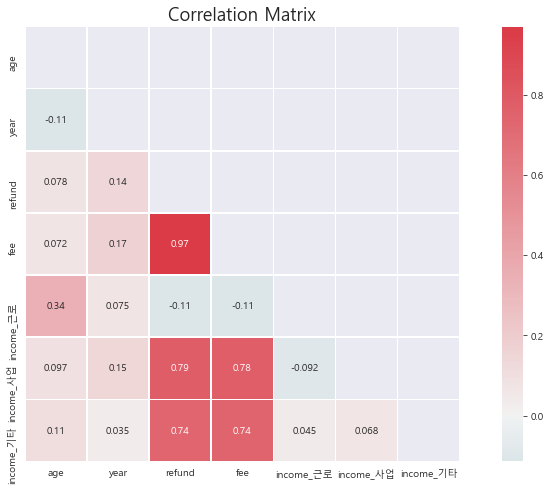

In [127]:
# sns.set(style="white")
corr = df2.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize = (15,8))
# f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True)
plt.show()

## 환급액 별 적정 수수료율 찾기

모든 금액에 대해 진행할 수 없으니 그룹을 나눠봐야겠다.
예상환급액 값을 그룹화를 해봐야겠다

In [3]:
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN
...,...,...,...,...,...,...,...,...,...
99995,27.0,F,2019,301000.0,11900.0,True,NaN,NaN,680000.0
99996,62.0,F,2019,77000.0,1300.0,True,NaN,463000.0,NaN
99997,24.0,M,2020,9000.0,400.0,False,7923000.0,54000.0,NaN
99998,24.0,M,2019,34000.0,400.0,True,NaN,204000.0,NaN


In [4]:
# 환급액 데이터 살펴보기
df['refund'].describe()

count    1.000000e+05
mean     2.081422e+05
std      3.071744e+05
min     -8.265000e+06
25%      3.300000e+04
50%      9.900000e+04
75%      2.540000e+05
max      7.725000e+06
Name: refund, dtype: float64

In [5]:
# 음수환급액
df[df['refund']<0]

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
10034,34.0,M,2015,-231000.0,8500.0,True,8989000.0,1714000.0,NaN
10624,25.0,F,2018,-7000.0,400.0,True,7508000.0,28000.0,NaN
22506,32.0,F,2019,-5000.0,400.0,False,7118000.0,259000.0,NaN
29515,41.0,F,2017,-10000.0,400.0,True,19718000.0,162000.0,128000.0
52648,26.0,F,2020,-397000.0,1300.0,False,8175000.0,247000.0,NaN
52858,34.0,M,2017,-2328000.0,400.0,False,16759000.0,28000.0,441000.0
54256,48.0,F,2018,-948000.0,3000.0,True,8157000.0,3975000.0,NaN
55168,28.0,F,2020,-1658000.0,1700.0,False,10509000.0,570000.0,NaN
57756,38.0,F,2017,-107000.0,4300.0,True,16619000.0,737000.0,NaN
68881,33.0,M,2016,-322000.0,400.0,True,NaN,57000.0,NaN


In [6]:
# 음수환급액 양수로 바꾸기
df['refund']=abs(df['refund'])
df['refund'].describe()

count    1.000000e+05
mean     2.084584e+05
std      3.069600e+05
min      0.000000e+00
25%      3.300000e+04
50%      9.900000e+04
75%      2.540000e+05
max      8.265000e+06
Name: refund, dtype: float64

In [7]:
# 수수료율 특성 계산하여 추가
df['수수료/환급액'] = df['fee']/df['refund']
df['수수료/환급액'].describe()

count    1.000000e+05
mean              inf
std               NaN
min      1.718213e-04
25%      1.830986e-02
50%      3.333333e-02
75%      3.942559e-02
max               inf
Name: 수수료/환급액, dtype: float64

In [8]:
# 무한대 수수료율 값 0으로 대체
df['수수료/환급액']=df['수수료/환급액'].replace([np.inf, -np.inf], 0)
df['수수료/환급액'].describe()

count    100000.000000
mean          0.034320
std           0.085026
min           0.000000
25%           0.018310
50%           0.033333
75%           0.039423
max          15.950000
Name: 수수료/환급액, dtype: float64

In [9]:
# 수수료율 반올림하여 소숫점 두자리까지 표현

df['수수료율_변환'] = round(df['수수료/환급액'],2)
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,수수료/환급액,수수료율_변환
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN,0.080000,0.08
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0,0.017000,0.02
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN,0.039792,0.04
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN,0.039512,0.04
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN,0.037719,0.04
...,...,...,...,...,...,...,...,...,...,...,...
99995,27.0,F,2019,301000.0,11900.0,True,NaN,NaN,680000.0,0.039535,0.04
99996,62.0,F,2019,77000.0,1300.0,True,NaN,463000.0,NaN,0.016883,0.02
99997,24.0,M,2020,9000.0,400.0,False,7923000.0,54000.0,NaN,0.044444,0.04
99998,24.0,M,2019,34000.0,400.0,True,NaN,204000.0,NaN,0.011765,0.01


In [10]:
# 환급액 금액별 그룹화 함수

def refund_range(x):
    if x <10000 : 
        return '10,000원 미만'
    elif x>=10000 and x<50000:
        return '10,000원 이상 50,000원 미만'
    elif x>=50000 and x<100000:
        return '50,000원 이상 100,000원 미만'
    elif x>=100000 and x<150000:
        return '100,000원 이상 150,000원 미만'
    elif x>=150000 and x<200000:
        return '150,000원 이상 200,000원 미만'
    elif x>=200000 and x<250000:
        return '200,000원 이상 250,000원 미만'
    elif x>=250000 and x<300000:
        return '250,000원 이상 300,000원 미만'
    else:
        return '300,000원 이상'

In [11]:
# 환급액 그룹적용
df['refund_변환'] = df['refund']
df["refund_변환"] = df.apply(lambda x: refund_range(x.refund_변환),axis=1)
df

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,수수료/환급액,수수료율_변환,refund_변환
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN,0.080000,0.08,"10,000원 미만"
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0,0.017000,0.02,"100,000원 이상 150,000원 미만"
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN,0.039792,0.04,"250,000원 이상 300,000원 미만"
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN,0.039512,0.04,"300,000원 이상"
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN,0.037719,0.04,"100,000원 이상 150,000원 미만"
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,27.0,F,2019,301000.0,11900.0,True,NaN,NaN,680000.0,0.039535,0.04,"300,000원 이상"
99996,62.0,F,2019,77000.0,1300.0,True,NaN,463000.0,NaN,0.016883,0.02,"50,000원 이상 100,000원 미만"
99997,24.0,M,2020,9000.0,400.0,False,7923000.0,54000.0,NaN,0.044444,0.04,"10,000원 미만"
99998,24.0,M,2019,34000.0,400.0,True,NaN,204000.0,NaN,0.011765,0.01,"10,000원 이상 50,000원 미만"


In [52]:
# df.to_excel('jobis_fee.xlsx')

In [13]:
# 환급액그룹,수수료율 별 특성평균값 확인
# 갯수, 환급액평균, 수수료평균, 결제비중 확인
grouped = df.groupby(['refund_변환','수수료율_변환'])
grouped_agg = grouped.agg({'refund':['count','mean'], 'fee':'mean','has_paid':'mean'})
grouped_agg 

refund               fee  has_paid
                                count     mean     mean      mean
refund_변환              수수료율_변환                                   
10,000원 미만             0.00        61      0.0   4600.0  0.475410
                       0.04      1002   9000.0    400.0  0.590818
                       0.05      1033   8000.0    400.0  0.553727
                       0.06      1560   7000.0    400.0  0.569872
                       0.07      1222   6000.0    400.0  0.556465
...                               ...      ...      ...       ...
50,000원 이상 100,000원 미만 0.65         1  57000.0  37000.0  1.000000
                       0.70         1  91000.0  63800.0  1.000000
                       0.71         2  77500.0  55050.0  0.500000
                       0.80         1  53000.0  42500.0  0.000000
                       1.50         1  54000.0  80800.0  1.000000

[244 rows x 4 columns]

In [14]:
# 인덱스 초기화
grouped_agg_reset_index = grouped_agg.reset_index()
grouped_agg_reset_index

refund_변환 수수료율_변환 refund               fee  has_paid
                                     count     mean     mean      mean
0                10,000원 미만    0.00     61      0.0   4600.0  0.475410
1                10,000원 미만    0.04   1002   9000.0    400.0  0.590818
2                10,000원 미만    0.05   1033   8000.0    400.0  0.553727
3                10,000원 미만    0.06   1560   7000.0    400.0  0.569872
4                10,000원 미만    0.07   1222   6000.0    400.0  0.556465
..                      ...     ...    ...      ...      ...       ...
239  50,000원 이상 100,000원 미만    0.65      1  57000.0  37000.0  1.000000
240  50,000원 이상 100,000원 미만    0.70      1  91000.0  63800.0  1.000000
241  50,000원 이상 100,000원 미만    0.71      2  77500.0  55050.0  0.500000
242  50,000원 이상 100,000원 미만    0.80      1  53000.0  42500.0  0.000000
243  50,000원 이상 100,000원 미만    1.50      1  54000.0  80800.0  1.000000

[244 rows x 6 columns]

In [76]:
# # 태블로확인하기위해 엑셀데이터로 저장
# grouped_agg_reset_index.to_excel('jobis_fee_grouped_agg.xlsx')

In [41]:
# 환급액 그룹별 평균 환급액 확인
grouped_agg_2 = df.groupby(['refund_변환']).agg({'refund':['count','mean'], 'fee':'mean','has_paid':'mean'}).reset_index()
grouped_agg_2

refund_변환 refund                          fee  has_paid
                            count           mean          mean      mean
0               10,000원 미만   8867    6026.051652    493.222059  0.544942
1    10,000원 이상 50,000원 미만  24981   27389.496017    514.731196  0.676995
2  100,000원 이상 150,000원 미만  10835  123393.447162   4317.591140  0.670789
3  150,000원 이상 200,000원 미만   7592  173237.750263   5903.253425  0.678082
4  200,000원 이상 250,000원 미만   5900  223459.152542   8083.389831  0.672203
5  250,000원 이상 300,000원 미만   4604  273106.211990   9849.804518  0.660947
6              300,000원 이상  20819  657473.846006  23800.076853  0.570056
7   50,000원 이상 100,000원 미만  16402   72690.098768   1670.485307  0.707597

### 각 수수료별 평균환급액으로 계산한 경우

In [69]:
# 수수료별 수수료합 계산

grouped_agg_reset_index['예상수수료합']= \
grouped_agg_reset_index['수수료율_변환']*\
grouped_agg_reset_index['has_paid','mean']*\
grouped_agg_reset_index['refund','count']*\
grouped_agg_reset_index['refund','mean']
grouped_agg_reset_index

refund_변환 수수료율_변환 refund               fee has_paid  \
                                     count     mean     mean     mean   
0                10,000원 미만    0.00     61     0.00  4600.00     0.48   
1                10,000원 미만    0.04   1002  9000.00   400.00     0.59   
2                10,000원 미만    0.05   1033  8000.00   400.00     0.55   
3                10,000원 미만    0.06   1560  7000.00   400.00     0.57   
4                10,000원 미만    0.07   1222  6000.00   400.00     0.56   
..                      ...     ...    ...      ...      ...      ...   
239  50,000원 이상 100,000원 미만    0.65      1 57000.00 37000.00     1.00   
240  50,000원 이상 100,000원 미만    0.70      1 91000.00 63800.00     1.00   
241  50,000원 이상 100,000원 미만    0.71      2 77500.00 55050.00     0.50   
242  50,000원 이상 100,000원 미만    0.80      1 53000.00 42500.00     0.00   
243  50,000원 이상 100,000원 미만    1.50      1 54000.00 80800.00     1.00   

       예상수수료합  
               
0        0.00  
1   213120.00  
2   228800.00  
3   373380.00  
4   285600.00  
..        ...  
239  37050.00  
240  63700.00  
241  55025.00  
242      0.00  
243  81000.00  

[244 rows x 7 columns]

In [76]:
# 그룹별 최대 예상수수료합 수수료율 추출
idxmax = grouped_agg_reset_index.groupby(grouped_agg_reset_index['refund_변환'])['예상수수료합'].idxmax()
grouped_agg_reset_index.loc[idxmax]

refund_변환 수수료율_변환 refund                fee has_paid  \
                                      count      mean     mean     mean   
5                 10,000원 미만    0.08   1992   5000.00   400.00     0.50   
62     10,000원 이상 50,000원 미만    0.02   9207  27052.03   522.30     0.66   
145  100,000원 이상 150,000원 미만    0.04   6991 124101.27  4759.93     0.63   
167  150,000원 이상 200,000원 미만    0.04   4873 173320.75  6704.23     0.61   
178  200,000원 이상 250,000원 미만    0.04   4577 224230.06  8662.95     0.63   
187  250,000원 이상 300,000원 미만    0.04   2915 273108.40 10654.92     0.59   
196              300,000원 이상    0.04  15173 687730.77 27170.68     0.49   
207   50,000원 이상 100,000원 미만    0.02   9629  73438.88  1290.90     0.68   

          예상수수료합  
                  
5      398800.00  
62    3301429.21  
145  21965925.33  
167  20736094.17  
178  26010687.35  
187  18942798.96  
196 205081316.14  
207   9574961.51

### 환급액 그룹별 평균환급액으로 계산한 경우

In [88]:
# 그룹별 평균 환급액 데이터 merge

grouped_agg_reset_index_merge = grouped_agg_reset_index.merge(grouped_agg_2[['refund_변환','refund']],how='left',on='refund_변환')
grouped_agg_reset_index_merge

C:\Users\jungjaehoon\anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


refund_변환 수수료율_변환 refund_x               fee has_paid  \
                                       count     mean     mean     mean   
0                10,000원 미만    0.00       61     0.00  4600.00     0.48   
1                10,000원 미만    0.04     1002  9000.00   400.00     0.59   
2                10,000원 미만    0.05     1033  8000.00   400.00     0.55   
3                10,000원 미만    0.06     1560  7000.00   400.00     0.57   
4                10,000원 미만    0.07     1222  6000.00   400.00     0.56   
..                      ...     ...      ...      ...      ...      ...   
239  50,000원 이상 100,000원 미만    0.65        1 57000.00 37000.00     1.00   
240  50,000원 이상 100,000원 미만    0.70        1 91000.00 63800.00     1.00   
241  50,000원 이상 100,000원 미만    0.71        2 77500.00 55050.00     0.50   
242  50,000원 이상 100,000원 미만    0.80        1 53000.00 42500.00     0.00   
243  50,000원 이상 100,000원 미만    1.50        1 54000.00 80800.00     1.00   

       예상수수료합 refund_y           
                 count     mean  
0        0.00     8867  6026.05  
1   213120.00     8867  6026.05  
2   228800.00     8867  6026.05  
3   373380.00     8867  6026.05  
4   285600.00     8867  6026.05  
..        ...      ...      ...  
239  37050.00    16402 72690.10  
240  63700.00    16402 72690.10  
241  55025.00    16402 72690.10  
242      0.00    16402 72690.10  
243  81000.00    16402 72690.10  

[244 rows x 9 columns]

In [66]:
pd.options.display.float_format = '{:.2f}'.format

In [89]:
grouped_agg_reset_index_100over_merge['예상수수료합']= \
grouped_agg_reset_index_100over_merge['refund_y','mean']*\
grouped_agg_reset_index_100over_merge['수수료율_변환']*\
grouped_agg_reset_index_100over_merge['refund_x','count']*\
grouped_agg_reset_index_100over_merge['has_paid','mean'] 
grouped_agg_reset_index_100over_merge

# refund 금액 그룹별 평균 refund 금액 *
# 수수료율 *
# 수수료율별 건수 *
# 수수료율별 결제비중 

refund_변환 수수료율_변환 refund_x                 fee has_paid  \
                                       count       mean     mean     mean   
0                10,000원 미만    0.04     1002    9000.00   400.00     0.59   
1                10,000원 미만    0.05     1033    8000.00   400.00     0.55   
2                10,000원 미만    0.06     1560    7000.00   400.00     0.57   
3                10,000원 미만    0.07     1222    6000.00   400.00     0.56   
4                10,000원 미만    0.08     1992    5000.00   400.00     0.50   
5                10,000원 미만    0.10     1840    4002.72   400.27     0.51   
6     10,000원 이상 50,000원 미만    0.01    10131   35510.81   400.00     0.72   
7     10,000원 이상 50,000원 미만    0.02     9207   27052.03   522.30     0.66   
8     10,000원 이상 50,000원 미만    0.03     3340   13803.89   406.29     0.63   
9     10,000원 이상 50,000원 미만    0.04     2049   10952.17   416.54     0.59   
10  100,000원 이상 150,000원 미만    0.02     1094  103439.67  1700.00     0.69   
11  100,000원 이상 150,000원 미만    0.03     2619  129824.74  3912.56     0.77   
12  100,000원 이상 150,000원 미만    0.04     6991  124101.27  4759.93     0.63   
13  150,000원 이상 200,000원 미만    0.02     1370  184972.26  4300.00     0.80   
14  150,000원 이상 200,000원 미만    0.03     1285  160431.13  4303.42     0.79   
15  150,000원 이상 200,000원 미만    0.04     4873  173320.75  6704.23     0.61   
16  200,000원 이상 250,000원 미만    0.02      654  206759.94  4300.00     0.84   
17  200,000원 이상 250,000원 미만    0.03      629  235171.70  7272.34     0.78   
18  200,000원 이상 250,000원 미만    0.04     4577  224230.06  8662.95     0.63   
19  250,000원 이상 300,000원 미만    0.03     1656  273177.54  8358.03     0.77   
20  250,000원 이상 300,000원 미만    0.04     2915  273108.40 10654.92     0.59   
21              300,000원 이상    0.01      115 1157860.87 14462.61     0.81   
22              300,000원 이상    0.02     3158  561533.25 11928.09     0.80   
23              300,000원 이상    0.03     2044  521591.00 14591.83     0.77   
24              300,000원 이상    0.04    15173  687730.77 27170.68     0.49   
25              300,000원 이상    0.05      248  845165.32 42128.23     0.64   
26   50,000원 이상 100,000원 미만    0.01     3587   60766.66   513.33     0.79   
27   50,000원 이상 100,000원 미만    0.02     9629   73438.88  1290.90     0.68   
28   50,000원 이상 100,000원 미만    0.03      827   83788.39  2320.80     0.74   
29   50,000원 이상 100,000원 미만    0.04      282   97379.43  4284.40     0.75   
30   50,000원 이상 100,000원 미만    0.05     1292   86825.08  4294.66     0.71   
31   50,000원 이상 100,000원 미만    0.06      647   74760.43  4316.07     0.66   

   refund_y                 예상수수료합  
      count      mean               
0      8867   6026.05    142696.90  
1      8867   6026.05    172345.08  
2      8867   6026.05    321429.60  
3      8867   6026.05    286840.06  
4      8867   6026.05    480637.88  
5      8867   6026.05    570667.09  
6     24981  27389.50   2000802.68  
7     24981  27389.50   3342614.09  
8     24981  27389.50   1730468.36  
9     24981  27389.50   1333320.67  
10    10835 123393.45   1863241.05  
11    10835 123393.45   7436923.06  
12    10835 123393.45  21840640.15  
13     7592 173237.75   3797371.49  
14     7592 173237.75   5301075.16  
15     7592 173237.75  20726164.44  
16     5900 223459.15   2444643.13  
17     5900 223459.15   3278145.77  
18     5900 223459.15  25921261.69  
19     4604 273106.21  10511858.10  
20     4604 273106.21  18942646.86  
21    20819 657473.85    611450.68  
22    20819 657473.85  33386521.90  
23    20819 657473.85  31026190.79  
24    20819 657473.85 196058700.88  
25    20819 657473.85   5194043.38  
26    16402  72690.10   2047680.08  
27    16402  72690.10   9477335.08  
28    16402  72690.10   1338951.62  
29    16402  72690.10    613504.43  
30    16402  72690.10   3329206.52  
31    16402  72690.10   1853597.52

In [90]:
# refund 그룹별 최대 수수료합

idxmax = grouped_agg_reset_index_100over_merge.groupby(grouped_agg_reset_index_100over_merge['refund_변환'])['예상수수료합'].idxmax()
grouped_agg_reset_index_100over_merge.loc[idxmax]

refund_변환 수수료율_변환 refund_x                fee has_paid  \
                                       count      mean     mean     mean   
5                10,000원 미만    0.10     1840   4002.72   400.27     0.51   
7     10,000원 이상 50,000원 미만    0.02     9207  27052.03   522.30     0.66   
12  100,000원 이상 150,000원 미만    0.04     6991 124101.27  4759.93     0.63   
15  150,000원 이상 200,000원 미만    0.04     4873 173320.75  6704.23     0.61   
18  200,000원 이상 250,000원 미만    0.04     4577 224230.06  8662.95     0.63   
20  250,000원 이상 300,000원 미만    0.04     2915 273108.40 10654.92     0.59   
24              300,000원 이상    0.04    15173 687730.77 27170.68     0.49   
27   50,000원 이상 100,000원 미만    0.02     9629  73438.88  1290.90     0.68   

   refund_y                 예상수수료합  
      count      mean               
5      8867   6026.05    570667.09  
7     24981  27389.50   3342614.09  
12    10835 123393.45  21840640.15  
15     7592 173237.75  20726164.44  
18     5900 223459.15  25921261.69  
20     4604 273106.21  18942646.86  
24    20819 657473.85 196058700.88  
27    16402  72690.10   9477335.08